#Project 1 - Dataset 5 - Wine

##Task 1

In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import requests, zipfile, io
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import OPTICS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, make_scorer
from plotly.subplots import make_subplots
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr, spearmanr

### Načtení dat

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CMinusBool/ZSU-1.-Project/main/wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Popis dat

|Attribute|Description|
|:-------|:-------|
|Alcohol | Obsah alkoholu ve víně, vyjádřený v procentech. Je to klíčový faktor ovlivňující chuť a charakter vína. |
|Malid_Acid | Kyselina jablečná:Kyselina jablečná je typ organické kyseliny, která se nachází v hroznech. Podílí se na trpkosti a kyselosti vína. Množství kyseliny jablečné může ovlivnit celkovou kyselost vína. |
|Ash | Popel:Obsah popela představuje anorganické minerální látky obsažené ve víně, které často pocházejí ze slupek a semen hroznů. Je to jedna ze složek, která se používá k posouzení celkového složení vína.|
|Ash_Alcanity | Popelnatost: Alkalita popela je měřítkem zásaditosti nebo alkality obsahu popela ve víně. Poskytuje informaci o schopnosti vína odolávat změnám kyselosti. |
|Magnesium | Hořčík: Hořčík je minerální látka obsažená ve víně. Jeho koncentrace může ovlivnit proces kvašení a celkovou strukturu vína. |
|Total_Phenols	 | Celkové fenoly: Celkové fenoly představují součet všech fenolových sloučenin ve víně. Fenoly přispívají k barvě, chuti a pocitu v ústech vína a působí také jako antioxidanty. |
|Flavanoids	 | Flavanoidy: Flavanoidy jsou podskupinou fenolových sloučenin. Přispívají k barvě a chuti vína a některé flavonoidy mají antioxidační vlastnosti. |
|Nonflavanoid_Phenols | Neflavanoidní fenoly: Neflavanoidní fenoly jsou další podskupinou fenolových sloučenin, kromě flavanoidů. Také přispívají k barvě, chuti a celkovému fenolovému profilu vína. |
| Proanthocyanins | Proantokyany: Proantokyaniny jsou druh flavonoidu, který přispívá k barvě a chuti červených vín. Jsou také známé pro své potenciální zdravotní účinky. |
| Color_Intensity | Intenzita barvy: Intenzita barvy udává hloubku a koncentraci barvy vína. Často se hodnotí vizuálně a může poskytnout informace o stylu a stáří vína. |
|Hue | Odstín: Odstín představuje barvu vína. Je měřítkem typu přítomné barvy, například červené, fialové nebo hnědé. |
|OD280 | OD280: OD280 označuje optickou hustotu při 280 nm, což je míra často používaná k posouzení obsahu bílkovin ve víně. Může také poskytnout informace o stabilitě a průzračnosti vína. |
|Proline | Prolin: Prolin je aminokyselina, která se nachází v hroznech a víně. Koncentrace prolinu může být ovlivněna faktory, jako je odrůda hroznů a podmínky prostředí. |

In [ ]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Můžeme vidět velký rozdíl v rozsahu hodnotu jednotlivých atributů.

Napříllad: Nonflavanoid_Phenols(~0.1 až ~0.6) a Proline(stovky až nižší tisíce)

In [ ]:
correlation_matrix = df.corr()

fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale="blues", aspect="auto")
fig.update_xaxes(side="bottom")

fig.show()

In [ ]:
pearson_corr = df.corr(method='pearson')

perman_corr = df.corr(method='kendall')

spearman_corr = df.corr(method='spearman')


fig1 = px.imshow(pearson_corr, text_auto=True, color_continuous_scale="blues", aspect="auto")
fig1.update_xaxes(side="bottom")
fig1.update_layout(title="Pearson Correlation Matrix")
fig1.show()


fig2 = px.imshow(perman_corr, text_auto=True, color_continuous_scale="blues", aspect="auto")
fig2.update_xaxes(side="bottom")
fig2.update_layout(title="kendall Correlation Matrix")
fig2.show()

fig3 = px.imshow(spearman_corr, text_auto=True, color_continuous_scale="blues", aspect="auto")
fig3.update_xaxes(side="bottom")
fig3.update_layout(title="spearman Correlation Matrix")
fig3.show()

- **Pearson correlation coefficient**
 - Vyskyuje se nám pár silnějších korelací
 - ~0.86 Total_phenols(Celkové fenoly) a Flavanoids (Flavanoidy)
   - Jelikož jsou Flavanoidy typem fenolů není toto překvapivé
 - ~0.787 Flavanoids(Flavanoidy) a OD280
   - OD280 nám říká kolik máme proteinů ve víně. Toto by možná mohly být mimo jiné flavanoidy.

 - ~0.699 Total_phenols(Celkové fenoly) a OD280
   - OD280 nám říká kolik máme proteinů ve víně. Toto by možná mohly být mimo jiné flavanoidy.

- **Kendall rank correlation coefficient**
 - Celkově nižší korelace
 -Jediná silná ~0.70 zůstává mezi Total_phenols(Celkové fenoly) a Flavanoids(Flavanoidy)
 - Ostatní jsou slabé - Další nejvyšší ~0.535 Flavanoidy a Proantokyany
- **Spearman rank correlation coefficient**
 - Tady jsou korelace mírně odlišné
 - Nejsilnější ~0.88 stále Total_phenols(Celkové fenoly) a Flavanoids (Flavanoidy)
 - Druhou nejsilnější ~0.741(mírný pokles) stále Flavanoids(Flavanoidy) a OD280
 - Třetí nejsilnější korelací již není Total_phenols(Celkové fenoly) a OD280,
  
    ale ~0.730 Flavanoids(Flavanoidy) a Proanthocyanins (Proantokyany)
   - Vypadá to, že se tyto dva fenoly často vyskytují ve vínech spolu

In [ ]:
for column in df.columns:
    fig = px.box(df, y=column, title=f'Box Plot for {column}')
    fig.show()

In [ ]:
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    print(f"IQR for {column}: {iqr}")

IQR for Alcohol: 1.3150000000000013
IQR for Malic_Acid: 1.48
IQR for Ash: 0.34750000000000014
IQR for Ash_Alcanity: 4.300000000000001
IQR for Magnesium: 19.0
IQR for Total_Phenols: 1.0574999999999999
IQR for Flavanoids: 1.67
IQR for Nonflavanoid_Phenols: 0.16749999999999998
IQR for Proanthocyanins: 0.7
IQR for Color_Intensity: 2.9800000000000004
IQR for Hue: 0.33750000000000013
IQR for OD280: 1.2325
IQR for Proline: 484.5


In [ ]:
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    spread_percentage = (iqr / (q1 + q3) * 2) * 100  # Spread as a percentage of the range
    print(f'Spread (IQR) in percentage for {column}: {spread_percentage:.2f}%')

Spread (IQR) in percentage for Alcohol: 10.10%
Spread (IQR) in percentage for Malic_Acid: 63.18%
Spread (IQR) in percentage for Ash: 14.58%
Spread (IQR) in percentage for Ash_Alcanity: 22.22%
Spread (IQR) in percentage for Magnesium: 19.49%
Spread (IQR) in percentage for Total_Phenols: 46.56%
Spread (IQR) in percentage for Flavanoids: 81.86%
Spread (IQR) in percentage for Nonflavanoid_Phenols: 47.35%
Spread (IQR) in percentage for Proanthocyanins: 43.75%
Spread (IQR) in percentage for Color_Intensity: 63.27%
Spread (IQR) in percentage for Hue: 35.48%
Spread (IQR) in percentage for OD280: 48.26%
Spread (IQR) in percentage for Proline: 65.23%


Vidime ze nektere atributy nemaji outliery:

Alkohol, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, OD280, Proline

Nektere atributy maji velice maly rozptyl

Alkohol - u vin se nevyskytuje velký rozsah v množství alkoholu

Ash, Magnesium

Některé mají naopak velký rozptyl:

Flavanoids, Color_Intensity, Malic_Acid

In [ ]:
df['Alcohol_Category'] = pd.cut(df['Alcohol'], bins=[11, 12.5, 13.5, 15], labels=['Low', 'Medium', 'High'])

In [ ]:
for column in df.columns[1:-1]:  # bez prvni a posledni
    fig = px.box(df, x='Alcohol_Category', y=column, title=f'Box Plot for {column} by Alcohol Category')
    fig.show()

**Zajímavé informace ze srovnání kategoriálních proměných alkoholu(low,medium a high) s ostatními atributy**
- Intenzita barvy stoupá ve vyšších kategoriich síly alkoholu, v kategorii medium je ovšem velký spread a vyskytují se zde vína jak s nízkou tak vysokou intenzitou barvy
- Stejně tak ve vyšších kategoriich síly alkoholu stoupá Prolin (Proline). Zde je to ještě viditelnější. Stejně tak se také zvětšuje jeho spread



In [ ]:
df['Hue_Category'] = pd.cut(df['Hue'], bins=[0.47, 0.88, 1.3, 1.72], labels=['Low', 'Medium', 'High'])

In [ ]:
category_order = ['High', 'Medium', 'Low' ]
for column in df.columns[:-2]:
    fig = px.box(df, x='Hue_Category', y=column, title=f'Box Plot for {column} by Hue Category')
    fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': category_order})
    fig.show()

**Zajímavé informace ze srovnání kategoriálních proměných Odstínu(low,medium a high) s ostatními atributy**
- Čím máme vyšší kategorie odstínu tím nižší je hodnota kyseliny jablečné a také se významně snižuje její spread.
- Stejné chování můžeme pozorovat u intenzity barvy(Color_Intensity)



### Shrnutí

#### Původní shrnutí

Můžeme vidět velký rozdíl v rozsahu hodnotu jednotlivých atributů.

Napříllad: Nonflavanoid_Phenols(~0.1 až ~0.6) a Proline(stovky až nižší tisíce)

Vyskyuje se nám pár silnějších korelací

Silné korelace: ~0.86 Total_phenols(Celkové fenoly) a Flavanoids (Flavanoidy) - Jelikož jsou Flavanoidy typem fenolů není toto překvapivé

~0.787 Flavanoids(Flavanoidy) a OD280 - OD280 nám říká kolik máme proteinů ve víně. Toto by možná mohly být mimo jiné flavanoidy.

~0.699 Total_phenols(Celkové fenoly) a OD280 - OD280 nám říká kolik máme proteinů ve víně. Toto by možná mohly být mimo jiné flavanoidy.

Nektere atributy nemají outliery:

Alkohol, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, OD280, Proline

Nektere atributy maji velice maly rozptyl

Alkohol - u vin se nevyskytuje velký rozsah v množství alkoholu

Ash, Magnesium

Některé mají naopak velký rozptyl:

Flavanoids, Color_Intensity, Malic_Acid



#### Rozšíření původního shrnutí

- **Pearson correlation coefficient**
 - Vyskyuje se nám pár silnějších korelací
 - ~0.86 Total_phenols(Celkové fenoly) a Flavanoids (Flavanoidy)
   - Jelikož jsou Flavanoidy typem fenolů není toto překvapivé
 - ~0.787 Flavanoids(Flavanoidy) a OD280
   - OD280 nám říká kolik máme proteinů ve víně. Toto by možná mohly být mimo jiné flavanoidy.

 - ~0.699 Total_phenols(Celkové fenoly) a OD280
   - OD280 nám říká kolik máme proteinů ve víně. Toto by možná mohly být mimo jiné flavanoidy.

- **Kendall rank correlation coefficient**
 - Celkově nižší korelace
 -Jediná silná ~0.70 zůstává mezi Total_phenols(Celkové fenoly) a Flavanoids(Flavanoidy)
 - Ostatní jsou slabé - Další nejvyšší ~0.535 Flavanoidy a Proantokyany
- **Spearman rank correlation coefficient**
 - Tady jsou korelace mírně odlišné
 - Nejsilnější ~0.88 stále Total_phenols(Celkové fenoly) a Flavanoids (Flavanoidy)
 - Druhou nejsilnější ~0.741(mírný pokles) stále Flavanoids(Flavanoidy) a OD280
 - Třetí nejsilnější korelací již není Total_phenols(Celkové fenoly) a OD280,
  
    ale ~0.730 Flavanoids(Flavanoidy) a Proanthocyanins (Proantokyany)
   - Vypadá to, že se tyto dva fenoly často vyskytují ve vínech spolu

**Zajímavé informace ze srovnání kategoriálních proměných alkoholu(low,medium a high) s ostatními atributy**
- Intenzita barvy stoupá ve vyšších kategoriich síly alkoholu, v kategorii medium je ovšem velký spread a vyskytují se zde vína jak s nízkou tak vysokou intenzitou barvy
- Stejně tak ve vyšších kategoriich síly alkoholu stoupá Prolin (Proline). Zde je to ještě viditelnější. Stejně tak se také zvětšuje jeho spread

**Zajímavé informace ze srovnání kategoriálních proměných Odstínu(low,medium a high) s ostatními atributy**
- Čím máme vyšší kategorie odstínu tím nižší je hodnota kyseliny jablečné a také se významně snižuje její spread.
- Stejné chování můžeme pozorovat u intenzity barvy(Color_Intensity)


# Task 2

### Preprocesing dat

V datasetu máme pouze numerické data a žádné nám nechybí.

Budeme je tedy pouze škálovat.

Zkusíme postupně jak Z-score normalization tak min-max

In [ ]:
scaler = StandardScaler()

z_normalized_data = scaler.fit_transform(df)

df_z_scaled = pd.DataFrame(z_normalized_data, columns=df.columns)

df_z_scaled

NameError: name 'StandardScaler' is not defined

In [ ]:
scaler = MinMaxScaler()

min_max_normalized_data = scaler.fit_transform(df)

df_m_scaled = pd.DataFrame(min_max_normalized_data, columns=df.columns)

df_m_scaled

NameError: name 'MinMaxScaler' is not defined

### K-Means clustering

#### Z-score scaling

In [ ]:
cluster_range = range(2, 11)
inertia_values = []
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=13)
    kmeans.fit(df_z_scaled)

    # Elbow Method: Sum of squared distances to the closest centroid
    inertia_values.append(kmeans.inertia_)

    # Silhouette Coefficient
    silhouette_scores.append(silhouette_score(df_z_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')

# Plot Silhouette Coefficient
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=13)
df['cluster'] = kmeans.fit_predict(df_z_scaled)
print("Clusters with Z score Scaling:")
print(df['cluster'].value_counts())

NameError: name 'KMeans' is not defined

In [ ]:
num_cols = len(df.columns) - 1

# Calculate the number of rows and columns for the subplot grid
num_rows = num_cols // 2 + num_cols % 2  # Add 1 row if there's an odd number of columns
num_cols_subplot = 2 if num_cols >= 2 else 1

# Create subplots with multiple rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols_subplot, subplot_titles=df.columns[:-1])

# Iterate through the columns and add box plots to subplots
for i, column in enumerate(df.columns[:-1]):
    row = i // num_cols_subplot + 1
    col = i % num_cols_subplot + 1

    box = px.box(df, x='cluster', y=column, title=f'Box Plot for {column}')
    for trace in box.data:
        fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(height=1080, width=1920, showlegend=False, title_text="Box Plots for Each Cluster")

# Show the figure
fig.show()

#### min-max scaling

In [ ]:
cluster_range = range(2, 11)
inertia_values = []
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=13)
    kmeans.fit(df_m_scaled)

    # Elbow Method: Sum of squared distances to the closest centroid
    inertia_values.append(kmeans.inertia_)

    # Silhouette Coefficient
    silhouette_scores.append(silhouette_score(df_m_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')

# Plot Silhouette Coefficient
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=13)
df['cluster'] = kmeans.fit_predict(df_m_scaled)

print("Clusters with Min-Max Scaling:")
print(df['cluster'].value_counts())

In [ ]:
num_cols = len(df.columns) - 1

# Calculate the number of rows and columns for the subplot grid
num_rows = num_cols // 2 + num_cols % 2  # Add 1 row if there's an odd number of columns
num_cols_subplot = 2 if num_cols >= 2 else 1

# Create subplots with multiple rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols_subplot, subplot_titles=df.columns[:-1])

# Iterate through the columns and add box plots to subplots
for i, column in enumerate(df.columns[:-1]):
    row = i // num_cols_subplot + 1
    col = i % num_cols_subplot + 1

    box = px.box(df, x='cluster', y=column, title=f'Box Plot for {column}')
    for trace in box.data:
        fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(height=1080, width=1920, showlegend=False, title_text="Box Plots for Each Cluster")

# Show the figure
fig.show()

# Cluster Descriptions

## Cluster 0

- **Characteristics:**
  - Alkohol - středně
  - Kyselina jablečná - nejvíce, také největší rozptyl
  - Popel - Střední hodnota, prakticky stejná s ostatnímy klustery
  - Popelnatost - nejvyší, ale pouze mírně vyšší než cluster 2
  - Hořčík - Střední hodnota, mírně nižší než cluster 1
  - Celkové fenoly - nejnižší hodnota
  - Flavanoidy - výrazně nejnižší
  - Neflavanoidní fenoly - nejvyšší
  - Proantokyany - nejnižší
  - Intenzita barvy - nejvyšší a největší rozptyl
  - Odstín - nejnižší
  - OD280 - výrazně nejnižší, velice malý rozptyl
  - Prolin - střední
- **Odhadovaná chuť**

  Toto víno je pravděpodobně tmavé, silné a hořké, s vysokou kyselostí a nízkou sladkostí. Má nízkou koncentraci flavonoidů, které jsou antioxidanty zodpovědné za barvu a chuť vína1. Toto víno by mohlo být vhodné pro milovníky suchých a robustních vín.

## Cluster 1

- **Characteristics:**
  - Alkohol - nejvyšší
  - Kyselina jablečná - střední, prakticky stejný s druhým clusterem, velice malý rozptyl, ale hodně outlierů
  - Popel - nejvyšší hodnota, prakticky stejná s ostatnímy klustery
  - Popelnatost - nejnižší
  - Hořčík - Nejvyšší
  - Celkové fenoly - Nejvyšší
  - Flavanoidy - Nejvyšší
  - Neflavanoidní fenoly - nejnižší
  - Proantokyany - Nejvyšší
  - Intenzita barvy - střední
  - Odstín - Nejvyšší, menší rozptyl
  - OD280 - Nejvyšší
  - Prolin - Nejvyšší
- **Odhadovaná chuť**

  Toto víno je pravděpodobně světlé, jemné a ovocné, s nízkou kyselostí a vysokou sladkostí. Má vysokou koncentraci flavonoidů, které dodávají vínu jasnou barvu a příjemnou chuť1. Toto víno by mohlo být vhodné pro milovníky sladkých a aromatických vín.

## Cluster 2

- **Characteristics:**
  - Alkohol - nejnižší
  - Kyselina jablečná - nejnižší
  - Popel - nejnižší, velký rozptyl
  - Popelnatost - střední, velice podobné 0 clusteru
  - Hořčík - nejnižší, hodně outlierů
  - Celkové fenoly - střední
  - Flavanoidy - střední, největší rozptyl
  - Neflavanoidní fenoly - střední, největší rozptyl
  - Proantokyany - střední, největší rozptyl
  - Intenzita barvy - nejnižší, malý rozptyl
  - Odstín - střední, velký rozptyl
  - OD280 - střední
  - Prolin - nejnižší
- **Odhadovaná chuť**

  Toto víno je pravděpodobně bledé, slabé a kyselé, s nízkou sladkostí a nízkým obsahem alkoholu. Má střední koncentraci flavonoidů, které nejsou ani příliš výrazné, ani příliš slabé. Toto víno by mohlo být vhodné pro milovníky lehkých a osvěžujících vín.

##OTHER clustering

### DBSCAN clustering

In [ ]:
eps = 0.5  # Adjust based on your data and desired cluster density
min_samples = 5  # Adjust based on the minimum number of points you want in a cluster

# Create DBSCAN instance
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit and predict clusters
clusters = dbscan.fit_predict(df_z_scaled)

print(np.unique(clusters))
#silhouette_avg = silhouette_score(df_z_scaled, clusters)
#print(f"Silhouette Score: {silhouette_avg}")

[-1]


In [ ]:
# Experiment with different values for eps and min_samples
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_z_scaled)
        unique_labels = np.unique(clusters)
        print(f"Eps={eps}, Min Samples={min_samples}, Unique Labels: {unique_labels}")

Eps=0.1, Min Samples=3, Unique Labels: [-1]
Eps=0.1, Min Samples=5, Unique Labels: [-1]
Eps=0.1, Min Samples=10, Unique Labels: [-1]
Eps=0.5, Min Samples=3, Unique Labels: [-1]
Eps=0.5, Min Samples=5, Unique Labels: [-1]
Eps=0.5, Min Samples=10, Unique Labels: [-1]
Eps=1.0, Min Samples=3, Unique Labels: [-1]
Eps=1.0, Min Samples=5, Unique Labels: [-1]
Eps=1.0, Min Samples=10, Unique Labels: [-1]


Má problém identifikovat klustery. Vidí jenom noise cluster.

### OPTICS clustering


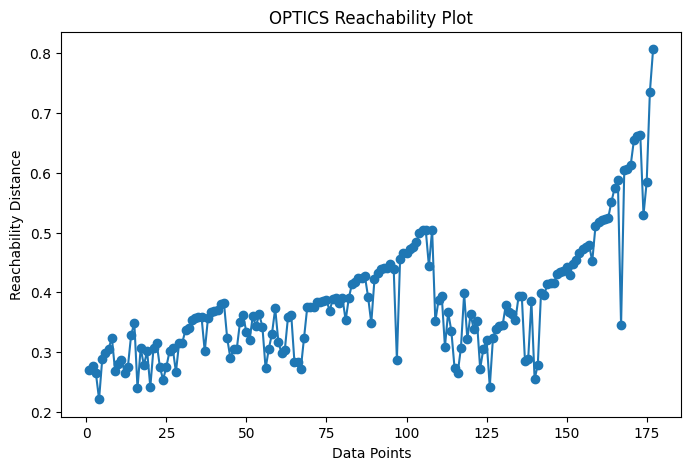

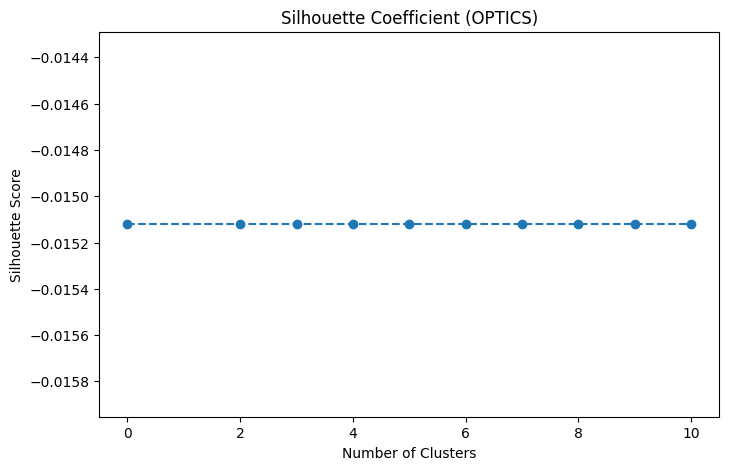

In [ ]:
optics_model = OPTICS(min_samples=2, xi=0.05, min_cluster_size=0.05)
optics_model.fit(df_m_scaled)

# Plotting OPTICS reachability plot
plt.figure(figsize=(8, 5))
plt.plot(optics_model.reachability_[optics_model.ordering_], marker='o')
plt.title('OPTICS Reachability Plot')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.show()

# Silhouette Score
silhouette_optics = silhouette_score(df_m_scaled, optics_model.labels_)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot([0] + list(range(2, 11)), [silhouette_optics] * 10, linestyle='--', marker='o')
plt.title('Silhouette Coefficient (OPTICS)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

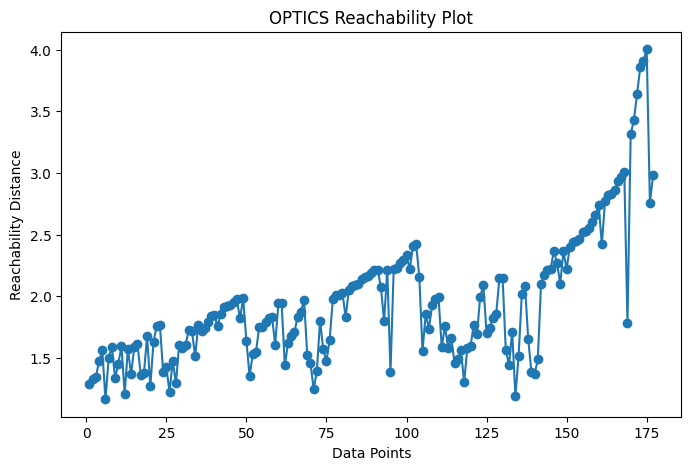

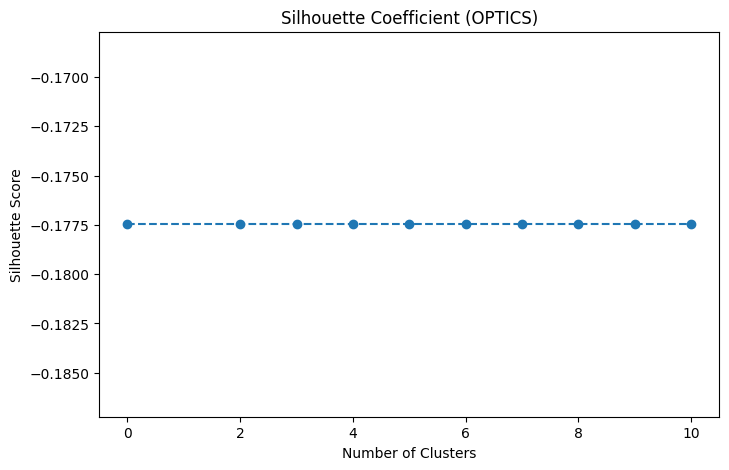

In [ ]:
optics_model = OPTICS(min_samples=2, xi=0.05, min_cluster_size=0.05)
optics_model.fit(df_z_scaled)

# Plotting OPTICS reachability plot
plt.figure(figsize=(8, 5))
plt.plot(optics_model.reachability_[optics_model.ordering_], marker='o')
plt.title('OPTICS Reachability Plot')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.show()

# Silhouette Score
silhouette_optics = silhouette_score(df_z_scaled, optics_model.labels_)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot([0] + list(range(2, 11)), [silhouette_optics] * 10, linestyle='--', marker='o')
plt.title('Silhouette Coefficient (OPTICS)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

- Siluethe skóre je nízké
- Nemění se s počtem klusterů

Nejedná se o vhodný algoritmus




### Gausian Mixture clustering

#### Hledaní nejlepších parametrů

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

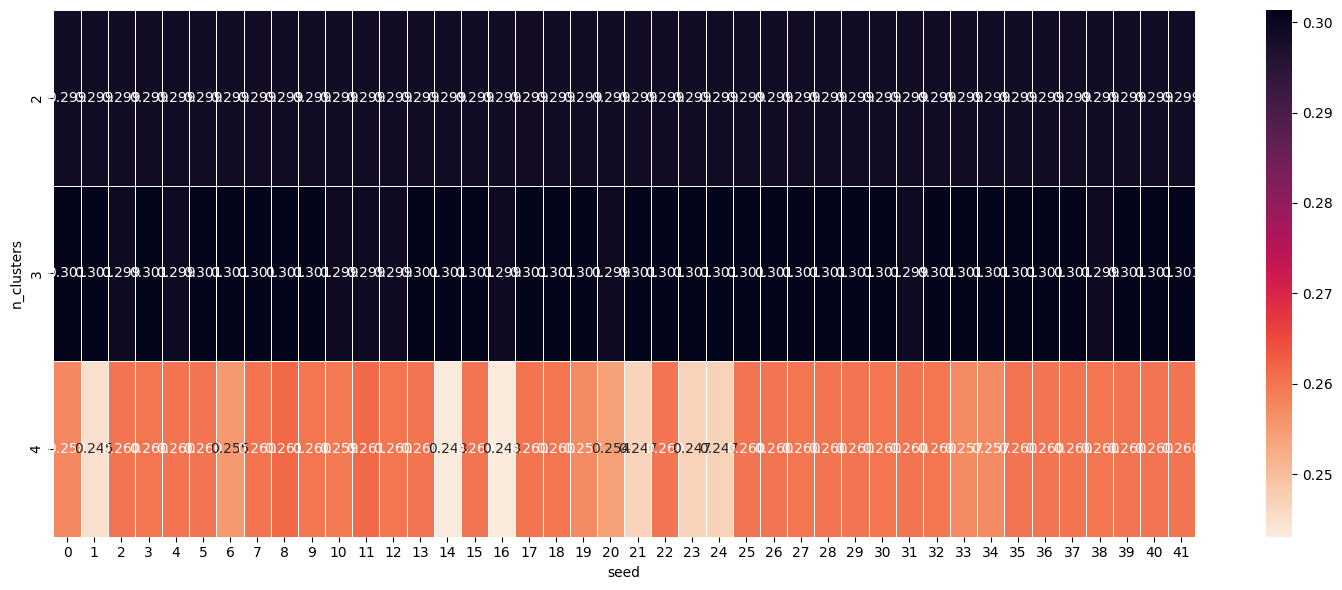

In [ ]:
clusters_range = range(2,5)
random_range = range(0,42)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(df_m_scaled)
        silhouette_avg = silhouette_score(df_m_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [ ]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=13)
clusters = gmm.fit_predict(df_z_scaled)

# Silhouette Score
silhouette_avg = silhouette_score(df_z_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index (lower values indicate better clustering)
db_index = davies_bouldin_score(df_z_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Calinski-Harabasz Index (higher values indicate better clustering)
ch_index = calinski_harabasz_score(df_z_scaled, clusters)
print(f"Calinski-Harabasz Index: {ch_index}")

Silhouette Score: 0.2828367184667964
Davies-Bouldin Index: 1.389996609651461
Calinski-Harabasz Index: 70.71682878884305


In [ ]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=13)
clusters = gmm.fit_predict(df_m_scaled)

# Silhouette Score
silhouette_avg = silhouette_score(df_m_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index (lower values indicate better clustering)
db_index = davies_bouldin_score(df_m_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Calinski-Harabasz Index (higher values indicate better clustering)
ch_index = calinski_harabasz_score(df_m_scaled, clusters)
print(f"Calinski-Harabasz Index: {ch_index}")

Silhouette Score: 0.2989254124791919
Davies-Bouldin Index: 1.3227818467188521
Calinski-Harabasz Index: 82.6049394100982


In [ ]:
gmm = GaussianMixture()

# Define the parameter grid
param_grid = {
    'n_components': [3],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'init_params': ['kmeans', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [50, 100, 200],
    'random_state': [13],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Create a silhouette scorer
silhouette_scorer = make_scorer(silhouette_score)

# Perform GridSearchCV
grid_search = GridSearchCV(gmm, param_grid, cv=5, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(df_m_scaled)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan

Best Parameters: {'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 50, 'n_components': 3, 'n_init': 10, 'random_state': 13, 'tol': 0.001}


In [ ]:
gmm = GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=50, n_components=3, n_init=10, random_state=13, tol=0.001)
clusters = gmm.fit_predict(df_m_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(df_m_scaled, clusters)

print("Silhouette Score:", silhouette_avg)

# Davies-Bouldin Index (lower values indicate better clustering)
db_index = davies_bouldin_score(df_m_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Calinski-Harabasz Index (higher values indicate better clustering)
ch_index = calinski_harabasz_score(df_m_scaled, clusters)
print(f"Calinski-Harabasz Index: {ch_index}")

Silhouette Score: 0.2927455860995386
Davies-Bouldin Index: 1.3248604776128416
Calinski-Harabasz Index: 80.65985556988703


Nejlepší parametry, které jsem našel jsou:

 n_components=3, covariance_type='full',

- Silhouette Score: 0.2989254124791919
-Davies-Bouldin Index: 1.3227818467188521
-Calinski-Harabasz Index: 82.6049394100982

#### Porovnání K-means a Gaussian Mixture

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=13)
df['kmeans_cluster'] = kmeans.fit_predict(df_m_scaled)

# Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=13)
df['gmm_cluster'] = gmm.fit_predict(df_m_scaled)

# Calculate silhouette score for KMeans
silhouette_kmeans = silhouette_score(df_m_scaled, df['kmeans_cluster'])

# Calculate silhouette score for GMM
silhouette_gmm = silhouette_score(df_m_scaled, df['gmm_cluster'])

# Calculate Davies-Bouldin Index for KMeans
db_index_kmeans = davies_bouldin_score(df_m_scaled, df['kmeans_cluster'])

# Calculate Davies-Bouldin Index for GMM
db_index_gmm = davies_bouldin_score(df_m_scaled, df['gmm_cluster'])

# Calculate Calinski-Harabasz Index for KMeans
ch_index_kmeans = calinski_harabasz_score(df_m_scaled, df['kmeans_cluster'])

# Calculate Calinski-Harabasz Index for GMM
ch_index_gmm = calinski_harabasz_score(df_m_scaled, df['gmm_cluster'])

# Display the results
print("Silhouette Score - KMeans:", silhouette_kmeans)
print("Silhouette Score - GMM:", silhouette_gmm)
print("\nDavies-Bouldin Index - KMeans:", db_index_kmeans)
print("Davies-Bouldin Index - GMM:", db_index_gmm)
print("\nCalinski-Harabasz Index - KMeans:", ch_index_kmeans)
print("Calinski-Harabasz Index - GMM:", ch_index_gmm)

Silhouette Score - KMeans: 0.3008938518500134
Silhouette Score - GMM: 0.2989254124791919

Davies-Bouldin Index - KMeans: 1.3086395800210653
Davies-Bouldin Index - GMM: 1.3227818467188521

Calinski-Harabasz Index - KMeans: 83.35112750771908
Calinski-Harabasz Index - GMM: 82.6049394100982


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
kmeans = KMeans(n_clusters=3, random_state=13)
df['kmeans_cluster'] = kmeans.fit_predict(df_m_scaled)

# Display KMeans cluster sizes
print("Clusters with KMeans:")
print(df['kmeans_cluster'].value_counts())

# Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=13)
df['gmm_cluster'] = gmm.fit_predict(df_m_scaled)

# Display GMM cluster sizes
print("Clusters with GMM:")
print(df['gmm_cluster'].value_counts())

# Calculate mean values for each feature in each cluster for KMeans
kmeans_means = df.groupby('kmeans_cluster').mean()

# Calculate mean values for each feature in each cluster for GMM
gmm_means = df.groupby('gmm_cluster_mapped').mean()

# Calculate the difference in means between KMeans and GMM
difference_in_means = gmm_means - kmeans_means

# Display the difference in means
print("Difference in Means between KMeans and GMM:")
print(difference_in_means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Clusters with KMeans:
2    62
1    61
0    55
Name: kmeans_cluster, dtype: int64
Clusters with GMM:
0    65
2    62
1    51
Name: gmm_cluster, dtype: int64


KeyError: ignored

Co se tyče počtu jsou klustery velice podobné
- 62 x 65
- 61 x 62
- 55 x 51

In [ ]:
num_cols = len(df.columns) - 1

# Calculate the number of rows and columns for the subplot grid
num_rows = num_cols // 2 + num_cols % 2  # Add 1 row if there's an odd number of columns
num_cols_subplot = 2 if num_cols >= 2 else 1

# Create subplots with multiple rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols_subplot, subplot_titles=df.columns[:-1])

# Iterate through the columns and add box plots to subplots
for i, column in enumerate(df.columns[:-1]):
    row = i // num_cols_subplot + 1
    col = i % num_cols_subplot + 1

    box = px.box(df, x='cluster', y=column, title=f'Box Plot for {column}')
    for trace in box.data:
        fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(height=1080, width=1920, showlegend=False, title_text="Box Plots for Each Cluster")

# Show the figure
fig.show()

### Shrnutí
- Velikosti jednotlivých klusterů jsou velice podobné
- Průměry jsou velice podobné

Jelikož nemám žádné znalosti o tom jak by měli klustery vypadat,

pouze, že by nejspíš mohly být 3. Protože máme 3 odrůdy vín.

Nemám jak určit, který z těchto 2 algoritmů je lepší.

Pokud se podivám na Silhouette Score, Davies-Bouldin Index a Calinski-Harabasz Index

vycházejí zanedbatelně lépe pro K-means.

Z tohoto důvodu je popis klusterů z předcházející části stále platný.

# Celkové shrnutí
## Ikdyž jsem předtím nevěděl prakticky nic o víně, tahle analýza mi do něho dala větší vhled
## Zjistil jsem,že není vůbec jednoduché vybrat klusterovací algoritmus a pořád nevím jak vybrat ten nejlepší.

:zkusit matice porovat s pearsnovym a permanoym koeficietem a podivat se jestli tam je nejaky rozdil.Jak vypadaji scater plloty.

Zkusit zkatergorizovat atibuty a porovnat boxploty